
# Test Performance of Models

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, Conv2D, Flatten, Dropout
import ptetaphi_nn
import tools
with open("filepath.txt", 'r') as f:
    filename = f.read().strip("\n")
    
s_table = tools.open_file(filename, sort_by="tag")

Using TensorFlow backend.


sorting data by tag


In [14]:
nt3 = s_table.nbtags==3  # 3 b tags
events = s_table[nt3]
print(len(events))

nj3 = s_table.nbjets<=4  # at most 4 b jets
events = s_table[nt3]
print(len(events))


# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]
events = events[events.tag[:,0] == 1]
events = events[events.tag[:,1] == 1]
events = events[events.tag[:,2] == 1]
print(len(events))


cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# then ensure require pt >= 40 and |eta| <= 2.5
#pt_filter = events.resolved_lv.pt < 40
#events.resolved_lv.pt[pt_filter] = 0
#events.resolved_lv.eta[pt_filter] = 0
#events.resolved_lv.phi[pt_filter] = 0


# then ensure require pt >= 40 and |eta| <= 2.5
#pt_filter = events.resolved_lv.pt < 40
#events.resolved_lv.pt[pt_filter] = 0
#events.resolved_lv.eta[pt_filter] = 0
#events.resolved_lv.phi[pt_filter] = 0

#eta_filter = (events.resolved_lv.eta >= -2.5) & (events.resolved_lv.eta >= 2.5)
#events.resolved_lv.pt[eta_filter] = 0
#events.resolved_lv.eta[eta_filter] = 0
#events.resolved_lv.phi[eta_filter] = 0
#print(events.resolved_lv.pt[0])
#print(events.tag[0])
print(len(events))

313660
313660
307055
307055


Loading model... 
Using architecture: models/architecture_2b.json 
and weights: models/weights_2b.h5


100%|██████████| 61411/61411 [00:00<00:00, 83258.34it/s]


overall accuracy: 71.79 percent
ignoring 1.0177329794336518 percent of 61411 events


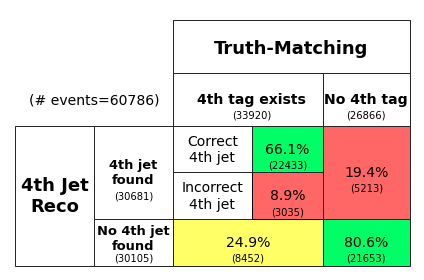

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import importlib
importlib.reload(ptetaphi_nn)
importlib.reload(tools)
nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_2b.json", "models/weights_2b.h5"), njets=10, print_csv=False)
nn.evaluate()